<a href="https://colab.research.google.com/github/denshustanov/ips/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.cvtColor(cv2.imread('corey.png'), cv2.COLOR_BGR2RGB)

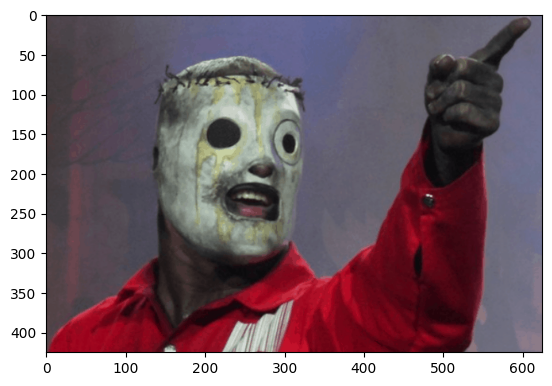

In [3]:
plt.imshow(img)

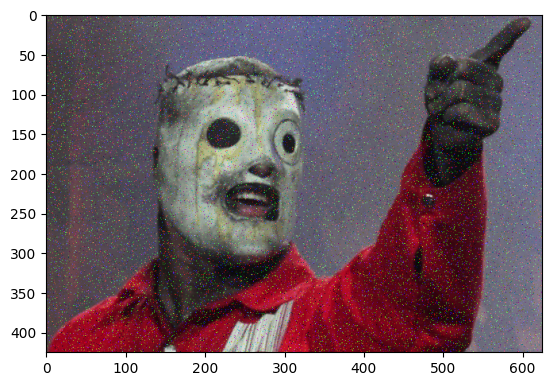

In [142]:
noise = np.random.normal(0, 50, img.shape).astype(int).clip(0, 255)
noise_p = np.random.uniform(size=img.shape)
noise_f = np.random.randint(0, 255, img.shape)
noise_p.shape
corey_noisy = img.copy()
corey_noisy[noise_p <= 0.06] = noise_f[noise_p <= 0.06]
plt.imshow(corey_noisy)

In [145]:
window = np.array([
    [2, 1, 2],
    [1, 3, 1],
    [2, 1, 2],
])

In [237]:
def rank_filtering(img, window, rank=1):
    (h, w, c) = img.shape
    (w_h, w_w) = window.shape
    n_h, n_w = h-w_h+1, w-w_w+1
    new_img = np.zeros((h, w, c), dtype=np.uint8)
    p_h, p_w = int(w_h/2), int(w_w/2)
    pad = np.pad(img, ((p_h, p_h), (p_w, p_w), (0, 0)), 'edge')
    fl_window = window.flatten()
    for k in range(c):
        channel = pad[:, :, k]
        for i in range(p_h, h+p_h):
            for j in range(p_w, w+p_w):
                img_window = np.sort(np.repeat(channel[i-p_w:i+p_h+1, j-p_w:j+p_w+1].flatten(), fl_window))
                # print(img_window, img_window[rank])
                # print(channel[i:i+w_h, j:j+w_w])
                new_img[i-p_h, j-p_w, k] = img_window[rank]
                # print(img_window[rank])
    return new_img



rank: 0, mse: 36.635829960784314


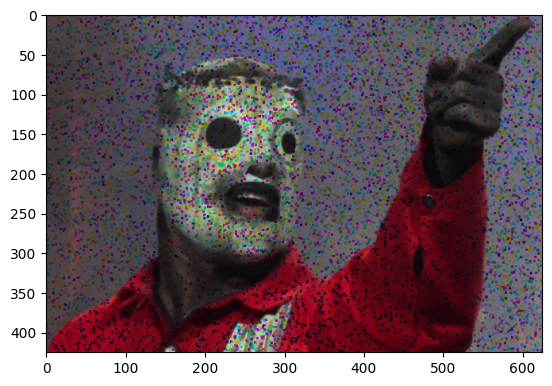

rank: 1, mse: 30.476458666666666


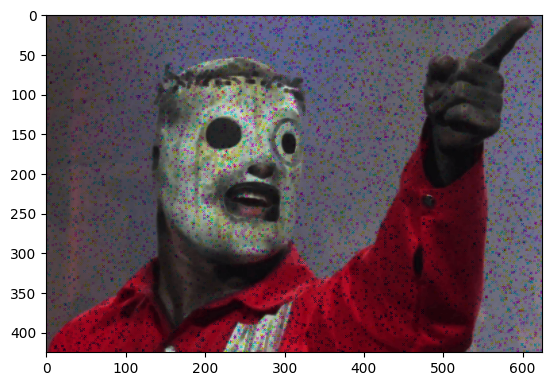

rank: 2, mse: 20.617354039215687


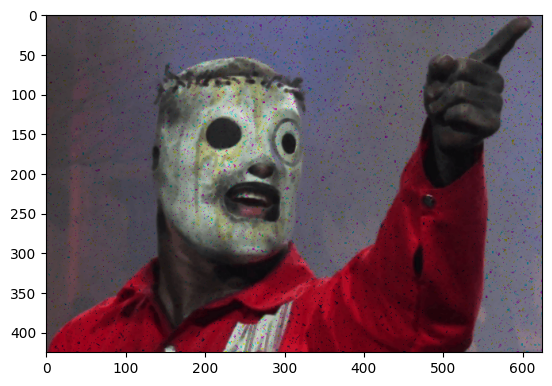

rank: 3, mse: 14.516605490196078


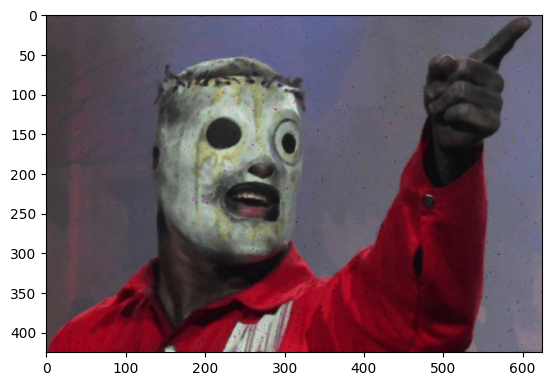

rank: 4, mse: 11.560332549019607


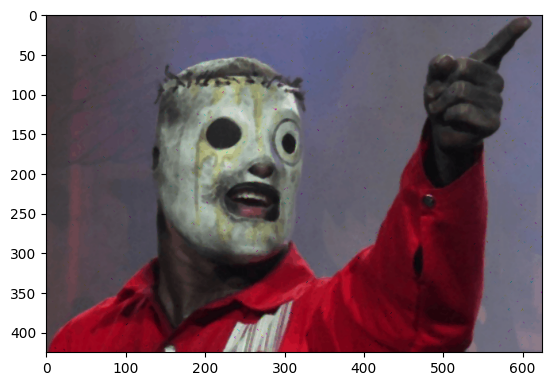

rank: 5, mse: 7.00139168627451


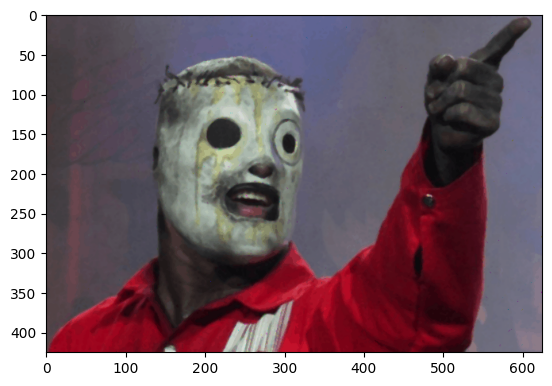

rank: 6, mse: 3.9017449411764704


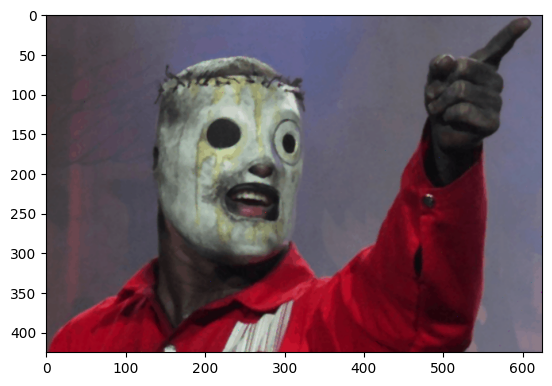

rank: 7, mse: 4.028162509803922


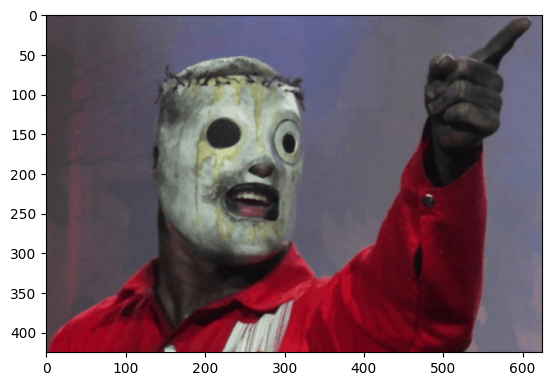

rank: 8, mse: 4.192180705882353


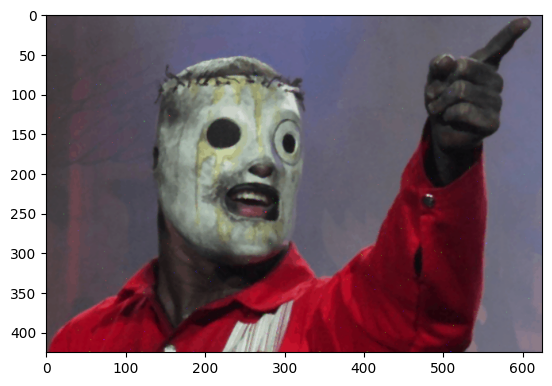

rank: 9, mse: 7.621189019607844


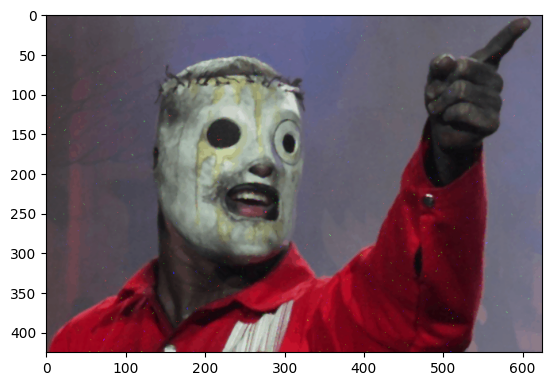

rank: 10, mse: 12.74991937254902


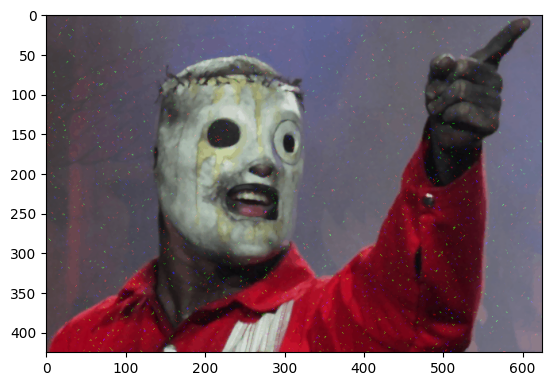

rank: 11, mse: 16.751406431372548


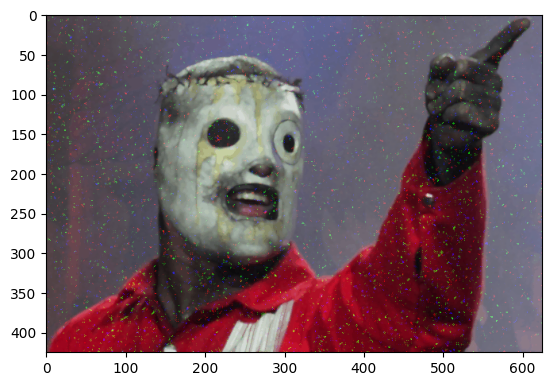

rank: 12, mse: 25.08355262745098


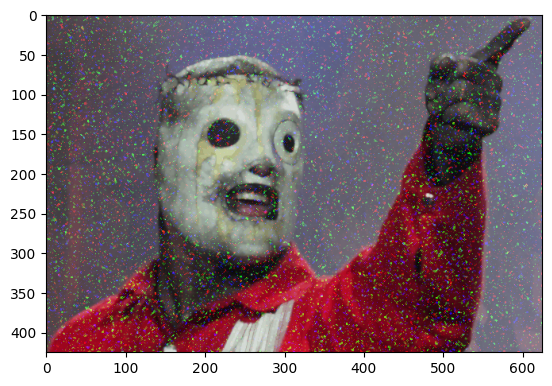

rank: 13, mse: 39.08998149019608


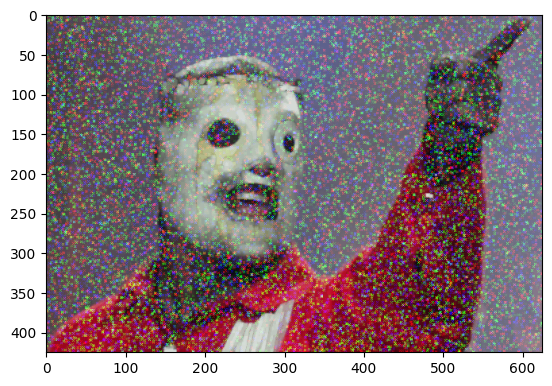

rank: 14, mse: 49.26187796078431


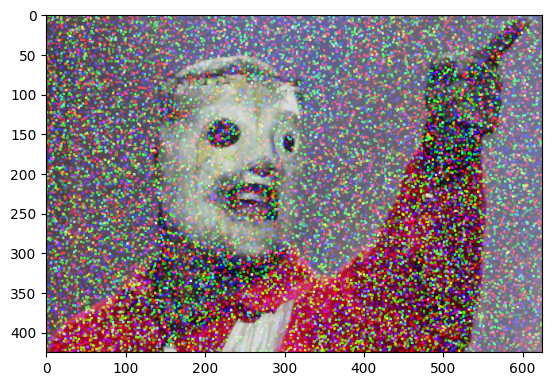

In [238]:
for rank in range(window.sum()):
    filtered = rank_filtering(corey_noisy, window, rank)
    print(f'rank: {rank}, mse: {mse(img, filtered)}')
    plt.imshow(filtered)
    plt.show()

In [227]:
def conv(img, kernel):
    (h, w, c) = img.shape
    (k_h, k_w) = kernel.shape
    p_h, p_w = int(k_h/2), int(k_w/2)
    print(h, w)
    new_img = np.zeros((h, w, c), dtype=np.uint8)
    pad = np.pad(img, ((p_h, p_h), (p_w, p_w), (0, 0)), 'edge')
    for k in range(c):
        channel = pad[:, :, k]
        for i in range(p_h, h+p_h):
            for j in range(p_w, w+p_w):
                new_img[i-p_h, j-p_w, k] = (channel[i-p_w:i+p_h+1, j-p_w:j+p_w+1] * kernel).sum()
    return new_img

In [222]:
kernel = np.array([
    [3, 1, 3],
    [1, 5, 1],
    [3, 1, 3],
]) / 21


In [228]:
f = conv(corey_noisy, kernel)

425 625


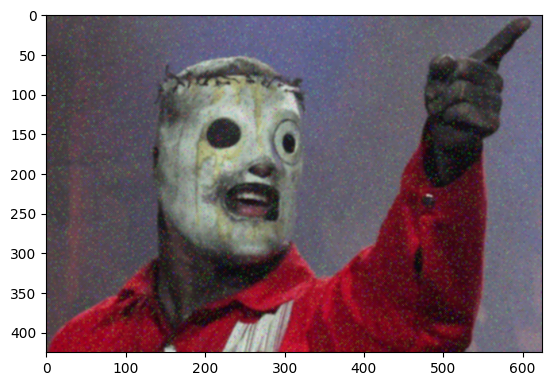

In [232]:
plt.imshow(f)

In [175]:
mse = lambda a, b: ((a-b)**2).mean()

In [233]:
mse(img, f)

30.105062901960785